In [20]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

df = pd.read_csv("WHR2024.csv")
df.head()

,Country name,Ladder score,upperwhisker,lowerwhisker,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,7.741,7.815,7.667,1.844,1.572,0.695,0.859,0.142,0.546,2.082
1,Denmark,7.583,7.665,7.500,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,7.525,7.618,7.433,1.881,1.617,0.718,0.819,0.258,0.182,2.050
3,Sweden,7.344,7.422,7.267,1.878,1.501,0.724,0.838,0.221,0.524,1.658
4,Israel,7.341,7.405,7.277,1.803,1.513,0.740,0.641,0.153,0.193,2.298


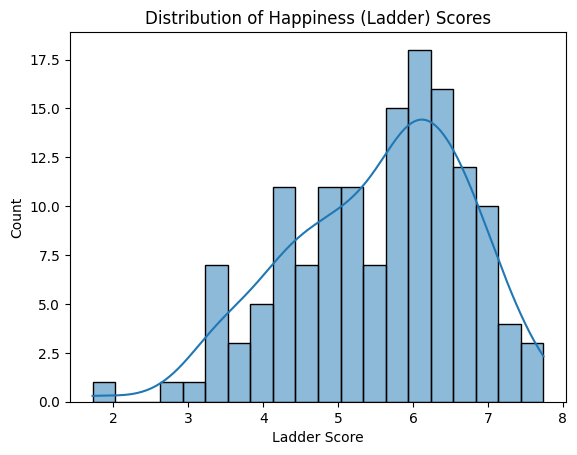

In [21]:
# Exploratory Data Analysis
# The distribution of Ladder score
sns.histplot(df["Ladder score"], kde=True, bins=20)
plt.title("Distribution of Happiness (Ladder) Scores")
plt.xlabel("Ladder Score")
plt.show()
#we can see that the distribution of Ladder score is a little bit left skewed and the mode score is around 6

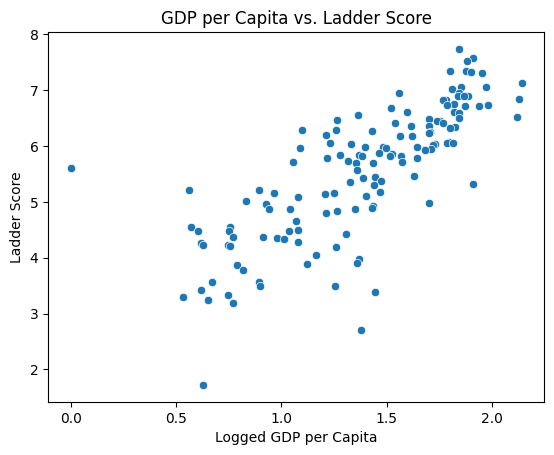

In [22]:
# This is a scatter plot of GDP per Capita vs. Ladder Score
sns.scatterplot(
    data=df, 
    x="Explained by: Log GDP per capita", 
    y="Ladder score", 
    hue="Regional indicator" if "Regional indicator" in df.columns else None
)
plt.title("GDP per Capita vs. Ladder Score")
plt.xlabel("Logged GDP per Capita")
plt.ylabel("Ladder Score")
plt.show()
# We can see that theres somehow correlation between these two variables

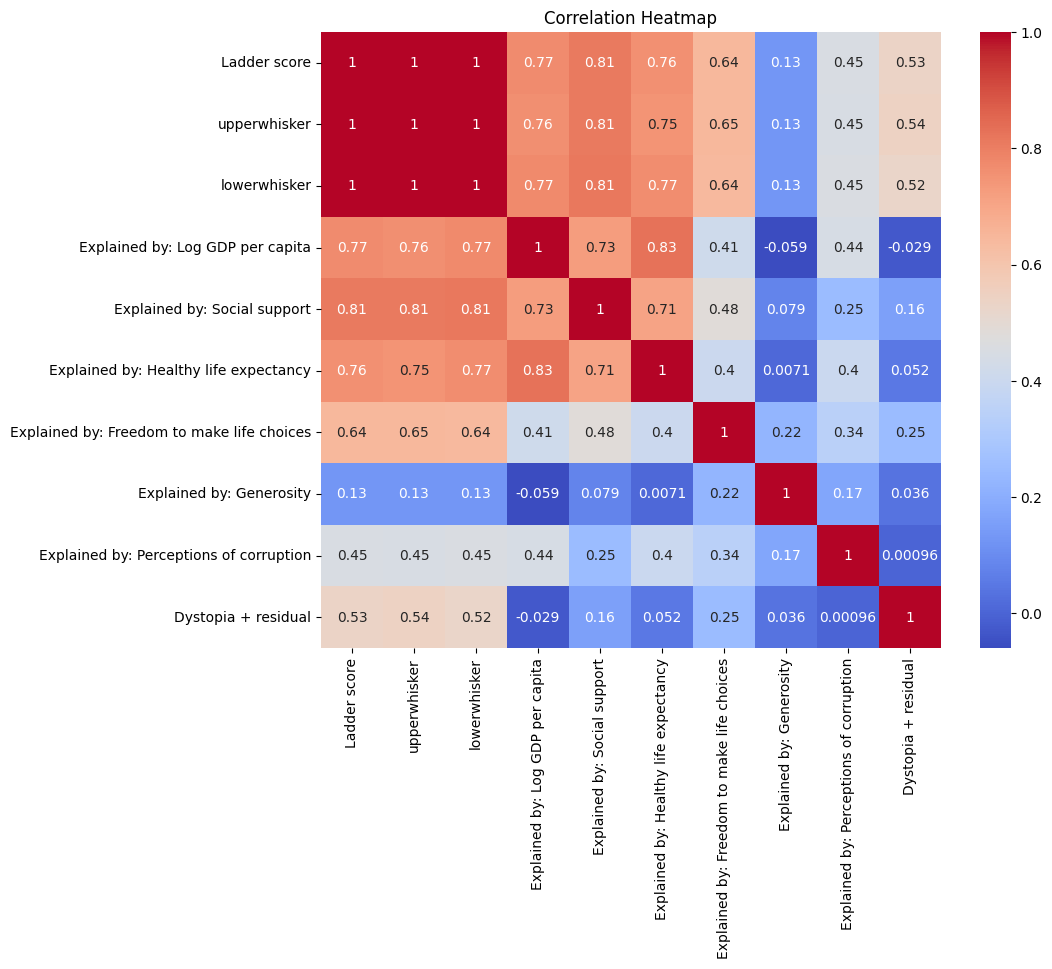

In [23]:
# We now move onto numeric variable and see the correlation between those pairs of variables
numeric_cols = df.select_dtypes(include=[np.number])
corr_matrix = numeric_cols.corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()
# We can see how these variables relate to each other, the warmer color shows that theres strong positive correlation between two variables; colder colors shows that more weak or negative correlation between these two variables.

## Hypothesis Formulation

Our Hypothesis would be that,

Null hypothesis is that the countries with higher GDP have the same mean ladder Score as those lower GDP.

Alternative hypothesis is that the countries with higher GDP have a different mean ladder Score than those lower GDP.

We will different higher and lower GDP by the above-median would be higher and below-median would be lower.

## Hypothesis testing

In [24]:
# this is a step that classifyimg higher and lower GDP for each country
median_gdp = df["Explained by: Log GDP per capita"].median()
above_median_gdp = df[df["Explained by: Log GDP per capita"] >= median_gdp]["Ladder score"].dropna()
below_median_gdp = df[df["Explained by: Log GDP per capita"] < median_gdp]["Ladder score"].dropna()
t_stat, p_val = ttest_ind(above_median_gdp, below_median_gdp, equal_var=False)

a = 0.05

#If the p-value is below 0.05, then we have the evidence that the two groups is different to each other in their mean happiness scores.
#If the p-value is above 0.05, then we dont have enough evidence to say that theres a difference between two groups.

print("t-statistic:", t_stat)
print("p-value:", p_val)

if p_val < alpha:
    print("reject")
else:
    print("not reject")

t-statistic: 10.48612126496865
p-value: 6.225968047738664e-19
reject


Since the p-value of our test is smaller than a = 0.05, we could claim that there is a significant difference in ladder score between the two groups.

## Documentation and Reporting

### 1. Introduction
We analyzed whether countries with higher GDP have different Ladder Score than those with lower GDP. The data comes from the World Happiness Report 2024. 

### 2. Method
**Grouping**: We split countries based on the median of Explained by: Log GDP per capita.

**Hypothesis**:  

Null hypothesis: The mean ladder score for above-median GDP countries = the mean Happiness Score for below-median GDP countries.  

Alternative hypothesis: These means differ.

**Test**: We used a **two-sample t-test** (ttest_ind) with equal_var=False

### 3. Results
An example outcome might show:

t-statistic** ≈ 10.49  
p-value ≈ 0  

Since p < a = 0.05, we reject the null hypothesis, which mens that there is a statistacally significant difference in mean ladder scores between the two GDP groups. In short, higher GDP contries would have higher ladder score.

### 4. Conclusion
From the result, we could claim that there is a significant difference in ladder score between the two groups. However, it doesnt mean that there is a causation between these two variables, and other factors (social support, freedom, health) may also drive well-being. Future research could include regression analysis or a cross time cmomparison to capture additional insights.
